In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [2]:
housing = pd.read_csv("./data/train.csv")
housing.shape

(1460, 81)

In [3]:
price = housing.SalePrice
housing.drop(["Id","SalePrice"],1,inplace = True)

In [4]:
test = pd.read_csv("./data/test.csv")
test.shape

(1459, 80)

In [5]:
test_id = test.Id
test.drop("Id",1,inplace = True)

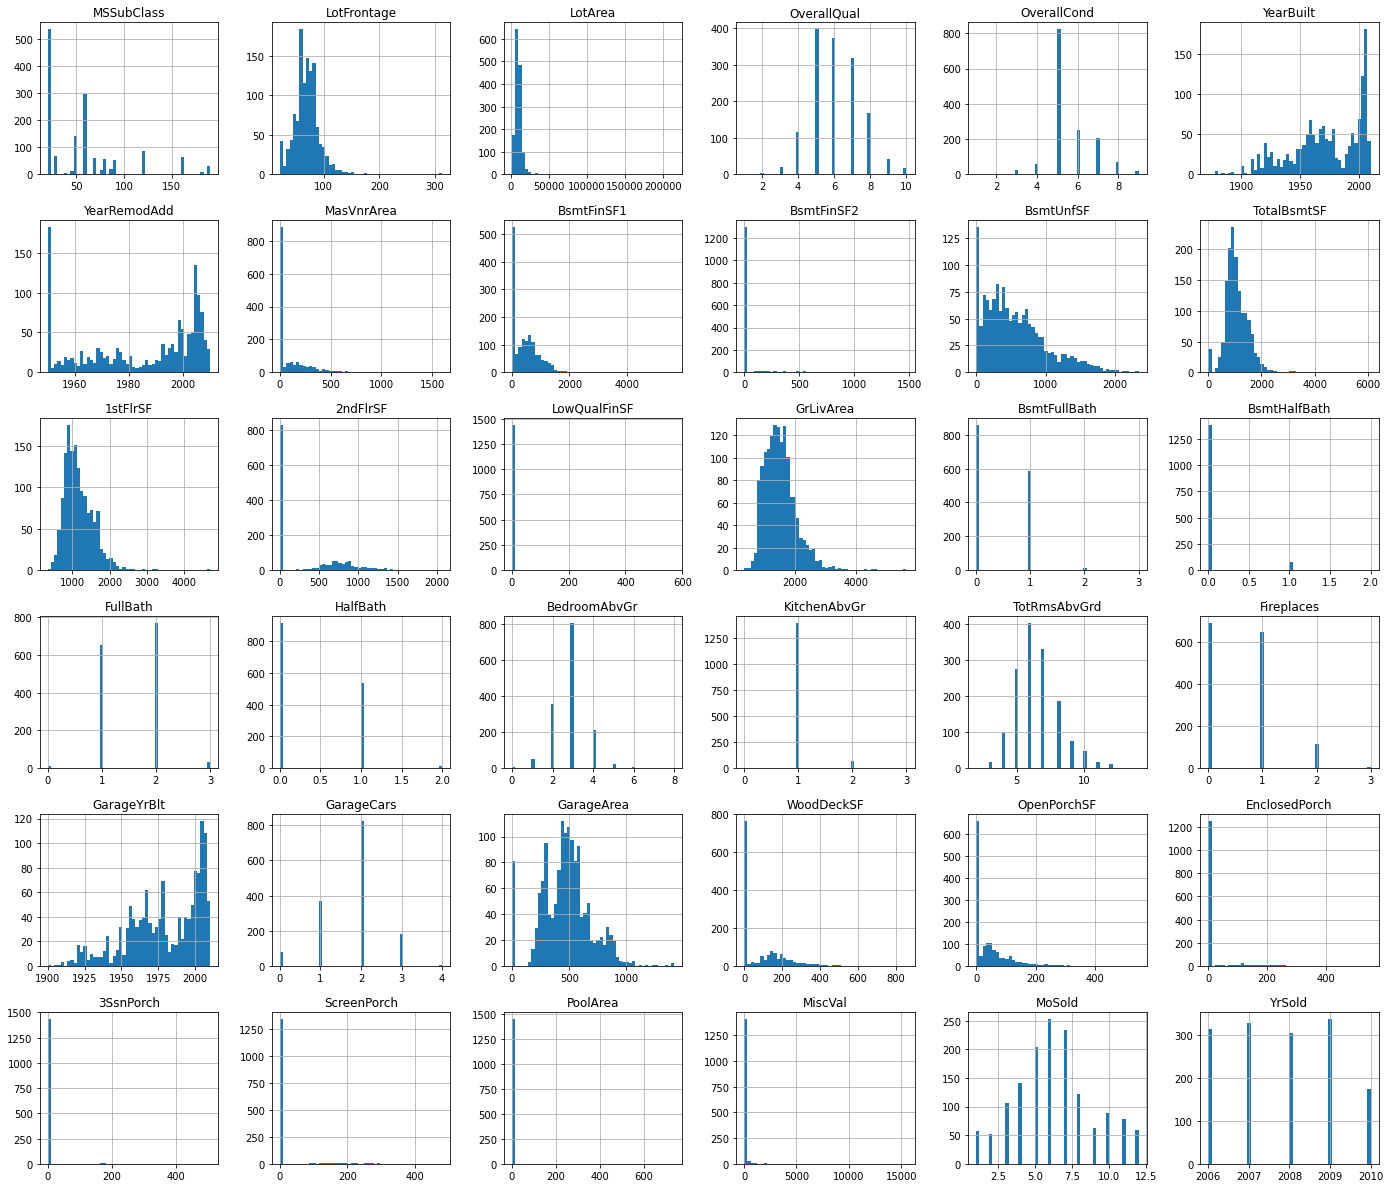

In [6]:
housing.hist(bins=50, figsize=(24,21))
plt.show()

# Handling null values

In [7]:
# one of the way to handle null values
#for col in housing.columns:
#    if housing[col].dtypes == 'O':        
#        housing[col].fillna("None",inplace = True)
#        test[col].fillna   ("None",inplace = True) 
#    else:
#        median = housing[col].median() 
#        housing[col].fillna(median,inplace = True)
#        test[col].fillna   (test[col].median(),inplace = True)

In [8]:
# another way to handle null values
from sklearn.impute import SimpleImputer

cat_vars = []
num_vars = []

imputer = SimpleImputer(strategy="median")

for col in housing.columns:
    if housing[col].dtypes == 'O':        
        cat_vars.append(col)
    else:
        num_vars.append(col)

imputer.fit(housing[num_vars])
housing[num_vars] = imputer.transform(housing[num_vars])

imputer.fit(test[num_vars])
test[num_vars] = imputer.transform(test[num_vars])

In [9]:
for col in cat_vars:
    print(col,":")
    print(housing[col].value_counts())
    print("\n")

MSZoning :
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Street :
Pave    1454
Grvl       6
Name: Street, dtype: int64


Alley :
Grvl    50
Pave    41
Name: Alley, dtype: int64


LotShape :
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


LandContour :
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Utilities :
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


LotConfig :
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


LandSlope :
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Neighborhood :
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr    

In [10]:
ord_vars = ["BsmtCond","CentralAir","PoolQC","Fence","PavedDrive","SaleCondition","GarageFinish","MiscFeature","GarageQual","Electrical","GarageCond","KitchenQual","FireplaceQu","BsmtExposure","GarageType","BsmtFinType1","Heating","HeatingQC","BsmtFinType2","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual"]
non_ord_vars = ["MSZoning","Alley","LotShape","LandContour","SaleType","LotConfig","LandSlope","Neighborhood","Functional"]
drop_vars = ["Utilities","Street"]

In [15]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

np.any(np.isnan(test[ord_vars]))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [12]:
housing[ord_vars] = ordinal_encoder.fit_transform(housing[ord_vars])
test[ord_vars]    = ordinal_encoder.fit_transform(test[ord_vars])

ValueError: Input contains NaN

In [ ]:
for col in cat_vars:
    housing[col] = housing[col].astype("category")
    housing[col] = housing[col].cat.codes + 1
    test[col]    = test[col].astype("category")
    test[col]    = test[col].cat.codes + 1

In [ ]:
housing.drop(drop_vars,1,inplace=True)
test.drop   (drop_vars,1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(housing,price,test_size=0.2, random_state=42)

# Training the Models

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

In [ ]:
scores = cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

In [ ]:
display_scores(lin_rmse_scores)

In [ ]:
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

In [ ]:
scores = cross_val_score(tree_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

In [ ]:
display_scores(tree_rmse_scores)

In [ ]:
y_pred = tree_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)

In [ ]:
scores = cross_val_score(forest_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
rf_rmse_scores

In [ ]:
display_scores(rf_rmse_scores)

In [ ]:
y_pred = forest_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

### Fine-Tune Random Forest Regressor Model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

### Model with best hyper parameters

In [ ]:
forest_reg_best = RandomForestRegressor(max_features = 8, n_estimators = 30)
forest_reg_best.fit(X_train,y_train)

In [ ]:
y_pred = forest_reg_best.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

In [ ]:
# check feature importance
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
attributes = X_train.columns

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)

### drop features with low importance

In [ ]:
drop_cols = ['LotConfig','Functional','PoolQC','Fence','SaleCondition','BsmtCond','EnclosedPorch','Electrical','LowQualFinSF','BsmtHalfBath','Alley','3SsnPorch','Condition2','MiscVal','Heating','MiscFeature']

In [ ]:
X_train.drop(drop_cols,1,inplace = True)
X_test.drop(drop_cols,1,inplace = True)
test.drop(drop_cols,1,inplace=True)

### Final Model

In [ ]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

# Prediction on test data and submission to kaggle

In [ ]:
forest_reg_best = RandomForestRegressor(max_features = 8, n_estimators = 30)
forest_reg_best.fit(X_train,y_train)
y_test_pred = forest_reg_best.predict(test)

In [ ]:
# lets prepare for the prediction submission
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_test_pred
sub.to_csv('submission.csv',index=False)